In [1]:
import tensorflow
import keras
import csv
import numpy
import matplotlib.pyplot as plot

random_seed = 0

#loading data
Path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv"
dataset = numpy.loadtxt(Path, delimiter=",", skiprows=1)

#shuffling data
numpy.random.seed(random_seed)
numpy.random.shuffle(dataset)

#loading inputs and outputs
X1 = dataset[:,2:3] #Glucose
X2 = dataset[:,7:8] #Resistin
X3 = dataset[:,0:1] #Age
X4 = dataset[:,1:2] #BMI
X5 = dataset[:,4:5] #HOMA
X6 = dataset[:,5:6] #Leptin
X7 = dataset[:,3:4] #Insulin
X8 = dataset[:,6:7] #Adiponectin
Y = dataset[:,9:10] #Classification

#normalization_function
def normalization(x):
    return (x - min(x)) / (max(x) - min(x))

#normalization
X1 = normalization(X1)
X2 = normalization(X2)
X3 = normalization(X3)
X4 = normalization(X4)
X5 = normalization(X5)
X6 = normalization(X6)
X7 = normalization(X7)
X8 = normalization(X8)

#load training data (Y)
Y = Y - 1

Using TensorFlow backend.


In [2]:
#setting a random seed
numpy.random.seed(random_seed)

#constructing input layers
input_layer_X1 = keras.layers.Input(shape=(1, ), name='input_layer_X1')
input_layer_X2 = keras.layers.Input(shape=(1, ), name='input_layer_X2')
input_layer_X3 = keras.layers.Input(shape=(1, ), name='input_layer_X3')
input_layer_X4 = keras.layers.Input(shape=(1, ), name='input_layer_X4')
input_layer_X5 = keras.layers.Input(shape=(1, ), name='input_layer_X5')
input_layer_X6 = keras.layers.Input(shape=(1, ), name='input_layer_X6')
input_layer_X7 = keras.layers.Input(shape=(1, ), name='input_layer_X7')
input_layer_X8 = keras.layers.Input(shape=(1, ), name='input_layer_X8')

#constructing hidden layers
merge_layer = keras.layers.concatenate([input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5, input_layer_X6, input_layer_X7, input_layer_X8], name='merge_layer')
hidden_layer_1 = keras.layers.Dense(9, activation = 'linear', name='hidden_layer_1')(merge_layer)
hidden_layer_2 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_2')(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_3')(hidden_layer_2)

#constructing output layer
output_layer = keras.layers.Dense(1, activation = 'sigmoid', name='output_layer')(hidden_layer_3)

#constructing the model of neural network
model = keras.models.Model(inputs=[input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5, input_layer_X6, input_layer_X7, input_layer_X8], outputs=output_layer)
model.summary()

#setting loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics = ['acc', keras.metrics.AUC()])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer_X1 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X2 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X3 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X4 (InputLayer)     (None, 1)            0                                            
____________________________________________________________________________________________

In [3]:
#training the model of neural network
train_history = model.fit([X1, X2, X3, X4, X5, X6, X7, X8], Y, validation_split=0.2, epochs = 700, batch_size = 1)

Train on 92 samples, validate on 24 samples
Epoch 1/700
92/92 [==============================] - 1s 8ms/step - loss: 0.7060 - acc: 0.4891 - auc_1: 0.5445 - val_loss: 0.6646 - val_acc: 0.7500 - val_auc_1: 0.6893
Epoch 2/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6695 - acc: 0.6087 - auc_1: 0.6133 - val_loss: 0.6322 - val_acc: 0.7083 - val_auc_1: 0.7179
Epoch 3/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6497 - acc: 0.6413 - auc_1: 0.6752 - val_loss: 0.6060 - val_acc: 0.7083 - val_auc_1: 0.7750
Epoch 4/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6209 - acc: 0.5978 - auc_1: 0.7210 - val_loss: 0.5778 - val_acc: 0.7083 - val_auc_1: 0.7893
Epoch 5/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5911 - acc: 0.6522 - auc_1: 0.7545 - val_loss: 0.5330 - val_acc: 0.8333 - val_auc_1: 0.8036
Epoch 6/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5739 - acc: 0.6630 - auc_1: 0.7643 - val_loss:

92/92 [==============================] - 0s 3ms/step - loss: 0.4462 - acc: 0.7935 - auc_1: 0.8631 - val_loss: 0.6130 - val_acc: 0.7500 - val_auc_1: 0.8786
Epoch 50/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4330 - acc: 0.7935 - auc_1: 0.8752 - val_loss: 0.4588 - val_acc: 0.8750 - val_auc_1: 0.8964
Epoch 51/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4690 - acc: 0.7500 - auc_1: 0.8550 - val_loss: 0.5142 - val_acc: 0.8333 - val_auc_1: 0.8929
Epoch 52/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4505 - acc: 0.7935 - auc_1: 0.8640 - val_loss: 0.6169 - val_acc: 0.6667 - val_auc_1: 0.8857
Epoch 53/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4520 - acc: 0.8152 - auc_1: 0.8438 - val_loss: 0.5798 - val_acc: 0.7500 - val_auc_1: 0.8964
Epoch 54/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4495 - acc: 0.7826 - auc_1: 0.8590 - val_loss: 0.5635 - val_acc: 0.7500 - val_auc_1: 0.8929
Epoch

Epoch 98/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3594 - acc: 0.8478 - auc_1: 0.9198 - val_loss: 0.5134 - val_acc: 0.8333 - val_auc_1: 0.8929
Epoch 99/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3517 - acc: 0.8804 - auc_1: 0.9162 - val_loss: 0.5328 - val_acc: 0.8333 - val_auc_1: 0.8929
Epoch 100/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3384 - acc: 0.9022 - auc_1: 0.9262 - val_loss: 0.5016 - val_acc: 0.8333 - val_auc_1: 0.8929
Epoch 101/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3547 - acc: 0.8696 - auc_1: 0.9176 - val_loss: 0.5230 - val_acc: 0.8333 - val_auc_1: 0.8929
Epoch 102/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3450 - acc: 0.8804 - auc_1: 0.9193 - val_loss: 0.5462 - val_acc: 0.7917 - val_auc_1: 0.8929
Epoch 103/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3270 - acc: 0.8804 - auc_1: 0.9452 - val_loss: 0.5954 - val_acc: 0.7500 - val_au

92/92 [==============================] - 0s 4ms/step - loss: 0.2564 - acc: 0.9022 - auc_1: 0.9605 - val_loss: 0.6641 - val_acc: 0.7500 - val_auc_1: 0.9036
Epoch 147/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2602 - acc: 0.9130 - auc_1: 0.9500 - val_loss: 0.6532 - val_acc: 0.8333 - val_auc_1: 0.9107
Epoch 148/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2401 - acc: 0.9239 - auc_1: 0.9612 - val_loss: 0.6474 - val_acc: 0.8333 - val_auc_1: 0.9107
Epoch 149/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2374 - acc: 0.9239 - auc_1: 0.9633 - val_loss: 0.6087 - val_acc: 0.8750 - val_auc_1: 0.9107
Epoch 150/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2371 - acc: 0.9239 - auc_1: 0.9614 - val_loss: 0.6305 - val_acc: 0.8333 - val_auc_1: 0.9107
Epoch 151/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2429 - acc: 0.9239 - auc_1: 0.9595 - val_loss: 0.6019 - val_acc: 0.8750 - val_auc_1: 0.9107


92/92 [==============================] - 0s 3ms/step - loss: 0.1713 - acc: 0.9457 - auc_1: 0.9829 - val_loss: 0.6412 - val_acc: 0.7917 - val_auc_1: 0.9071
Epoch 195/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1669 - acc: 0.9348 - auc_1: 0.9845 - val_loss: 0.5836 - val_acc: 0.8333 - val_auc_1: 0.9071
Epoch 196/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1618 - acc: 0.9457 - auc_1: 0.9840 - val_loss: 0.6335 - val_acc: 0.7917 - val_auc_1: 0.9071
Epoch 197/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1729 - acc: 0.9565 - auc_1: 0.9805 - val_loss: 0.6336 - val_acc: 0.7917 - val_auc_1: 0.9071
Epoch 198/700
92/92 [==============================] - 0s 5ms/step - loss: 0.1749 - acc: 0.9457 - auc_1: 0.9814 - val_loss: 0.6281 - val_acc: 0.7917 - val_auc_1: 0.9071
Epoch 199/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1705 - acc: 0.9457 - auc_1: 0.9831 - val_loss: 0.6386 - val_acc: 0.7917 - val_auc_1: 0.9071


92/92 [==============================] - 0s 4ms/step - loss: 0.0970 - acc: 0.9674 - auc_1: 0.9943 - val_loss: 0.5005 - val_acc: 0.8750 - val_auc_1: 0.9071
Epoch 243/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0962 - acc: 0.9674 - auc_1: 0.9938 - val_loss: 0.5346 - val_acc: 0.7917 - val_auc_1: 0.9107
Epoch 244/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0953 - acc: 0.9674 - auc_1: 0.9945 - val_loss: 0.5102 - val_acc: 0.8333 - val_auc_1: 0.9107
Epoch 245/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0921 - acc: 0.9783 - auc_1: 0.9938 - val_loss: 0.5522 - val_acc: 0.7917 - val_auc_1: 0.9143
Epoch 246/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0945 - acc: 0.9674 - auc_1: 0.9948 - val_loss: 0.5135 - val_acc: 0.8333 - val_auc_1: 0.9107
Epoch 247/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0986 - acc: 0.9783 - auc_1: 0.9943 - val_loss: 0.5778 - val_acc: 0.7917 - val_auc_1: 0.9143


92/92 [==============================] - 0s 4ms/step - loss: 0.0568 - acc: 0.9891 - auc_1: 0.9986 - val_loss: 0.6356 - val_acc: 0.7917 - val_auc_1: 0.9143
Epoch 291/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0587 - acc: 0.9891 - auc_1: 0.9981 - val_loss: 0.6465 - val_acc: 0.7917 - val_auc_1: 0.9107
Epoch 292/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0586 - acc: 0.9891 - auc_1: 0.9981 - val_loss: 0.6911 - val_acc: 0.7917 - val_auc_1: 0.9036
Epoch 293/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0604 - acc: 0.9783 - auc_1: 0.9976 - val_loss: 0.6546 - val_acc: 0.7917 - val_auc_1: 0.9036
Epoch 294/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0600 - acc: 0.9891 - auc_1: 0.9976 - val_loss: 0.6646 - val_acc: 0.7917 - val_auc_1: 0.9071
Epoch 295/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0580 - acc: 0.9891 - auc_1: 0.9986 - val_loss: 0.5181 - val_acc: 0.8333 - val_auc_1: 0.9179


92/92 [==============================] - 0s 3ms/step - loss: 0.0417 - acc: 0.9891 - auc_1: 0.9986 - val_loss: 0.7761 - val_acc: 0.7917 - val_auc_1: 0.8929
Epoch 339/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0407 - acc: 0.9891 - auc_1: 0.9986 - val_loss: 0.7191 - val_acc: 0.7917 - val_auc_1: 0.8857
Epoch 340/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0390 - acc: 0.9891 - auc_1: 0.9990 - val_loss: 0.7323 - val_acc: 0.7917 - val_auc_1: 0.8964
Epoch 341/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0380 - acc: 0.9891 - auc_1: 0.9986 - val_loss: 0.7016 - val_acc: 0.7917 - val_auc_1: 0.8929
Epoch 342/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0372 - acc: 0.9891 - auc_1: 0.9990 - val_loss: 0.7152 - val_acc: 0.7917 - val_auc_1: 0.8929
Epoch 343/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0385 - acc: 0.9891 - auc_1: 0.9986 - val_loss: 0.7083 - val_acc: 0.7917 - val_auc_1: 0.8786


92/92 [==============================] - 0s 3ms/step - loss: 0.0303 - acc: 0.9891 - auc_1: 0.9995 - val_loss: 0.8515 - val_acc: 0.7917 - val_auc_1: 0.8786
Epoch 387/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0318 - acc: 0.9891 - auc_1: 0.9995 - val_loss: 0.8730 - val_acc: 0.7917 - val_auc_1: 0.8607
Epoch 388/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0314 - acc: 0.9891 - auc_1: 1.0000 - val_loss: 0.8630 - val_acc: 0.7917 - val_auc_1: 0.8786
Epoch 389/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0284 - acc: 0.9891 - auc_1: 1.0000 - val_loss: 0.8834 - val_acc: 0.7917 - val_auc_1: 0.8750
Epoch 390/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0329 - acc: 0.9891 - auc_1: 1.0000 - val_loss: 1.0186 - val_acc: 0.7500 - val_auc_1: 0.8714
Epoch 391/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0482 - acc: 0.9891 - auc_1: 0.9986 - val_loss: 1.0473 - val_acc: 0.7917 - val_auc_1: 0.8393


92/92 [==============================] - 0s 3ms/step - loss: 0.0132 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.8895 - val_acc: 0.7917 - val_auc_1: 0.8571
Epoch 435/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0130 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.8905 - val_acc: 0.7917 - val_auc_1: 0.8536
Epoch 436/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0128 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9049 - val_acc: 0.7917 - val_auc_1: 0.8536
Epoch 437/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0136 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.8945 - val_acc: 0.7917 - val_auc_1: 0.8643
Epoch 438/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0127 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.8840 - val_acc: 0.7917 - val_auc_1: 0.8536
Epoch 439/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0122 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.8940 - val_acc: 0.7917 - val_auc_1: 0.8536


92/92 [==============================] - 0s 3ms/step - loss: 0.0074 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9880 - val_acc: 0.7500 - val_auc_1: 0.8429
Epoch 483/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0074 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9912 - val_acc: 0.7500 - val_auc_1: 0.8429
Epoch 484/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0072 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9959 - val_acc: 0.7500 - val_auc_1: 0.8393
Epoch 485/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0071 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.0023 - val_acc: 0.7500 - val_auc_1: 0.8393
Epoch 486/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0070 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.0064 - val_acc: 0.7500 - val_auc_1: 0.8393
Epoch 487/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0069 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.0085 - val_acc: 0.7500 - val_auc_1: 0.8393


92/92 [==============================] - 0s 4ms/step - loss: 0.0032 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1116 - val_acc: 0.7500 - val_auc_1: 0.8357
Epoch 531/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0031 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1902 - val_acc: 0.7083 - val_auc_1: 0.8536
Epoch 532/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0030 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2084 - val_acc: 0.7083 - val_auc_1: 0.8536
Epoch 533/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1618 - val_acc: 0.7083 - val_auc_1: 0.8286
Epoch 534/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3033 - val_acc: 0.7083 - val_auc_1: 0.8464
Epoch 535/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2419 - val_acc: 0.7083 - val_auc_1: 0.8464


92/92 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2080 - val_acc: 0.7083 - val_auc_1: 0.8286
Epoch 579/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0021 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2138 - val_acc: 0.7083 - val_auc_1: 0.8286
Epoch 580/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2147 - val_acc: 0.7083 - val_auc_1: 0.8286
Epoch 581/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2186 - val_acc: 0.7083 - val_auc_1: 0.8286
Epoch 582/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2262 - val_acc: 0.7083 - val_auc_1: 0.8286
Epoch 583/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2260 - val_acc: 0.7083 - val_auc_1: 0.8286


92/92 [==============================] - 0s 5ms/step - loss: 0.0101 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.5679 - val_acc: 0.7500 - val_auc_1: 0.8250
Epoch 627/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0316 - acc: 0.9783 - auc_1: 0.9995 - val_loss: 1.5942 - val_acc: 0.6667 - val_auc_1: 0.7821
Epoch 628/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0368 - acc: 0.9891 - auc_1: 0.9990 - val_loss: 1.5250 - val_acc: 0.7500 - val_auc_1: 0.8143
Epoch 629/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0029 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4729 - val_acc: 0.7083 - val_auc_1: 0.8214
Epoch 630/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4764 - val_acc: 0.7083 - val_auc_1: 0.8214
Epoch 631/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4797 - val_acc: 0.7083 - val_auc_1: 0.8214


92/92 [==============================] - 0s 4ms/step - loss: 9.9886e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4505 - val_acc: 0.7083 - val_auc_1: 0.8071
Epoch 675/700
92/92 [==============================] - 0s 4ms/step - loss: 9.8545e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4500 - val_acc: 0.7083 - val_auc_1: 0.8071
Epoch 676/700
92/92 [==============================] - 0s 4ms/step - loss: 9.7043e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4447 - val_acc: 0.7083 - val_auc_1: 0.8143
Epoch 677/700
92/92 [==============================] - 0s 5ms/step - loss: 9.6503e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4478 - val_acc: 0.7083 - val_auc_1: 0.8143
Epoch 678/700
92/92 [==============================] - 0s 4ms/step - loss: 9.5353e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4524 - val_acc: 0.7083 - val_auc_1: 0.8071
Epoch 679/700
92/92 [==============================] - 0s 4ms/step - loss: 9.3803e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4442 - val_acc: 0.7

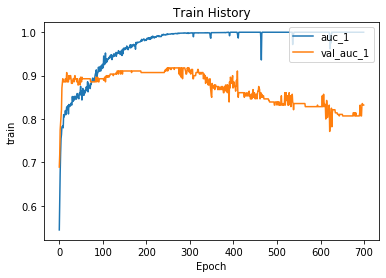

[array([[-0.92546594,  0.7658647 , -1.0870438 , -1.2051817 , -1.1733627 ,
         1.814037  , -1.2957255 , -0.67039937, -1.8313352 ],
       [-1.1504388 ,  0.81129175, -2.342549  , -0.68388045,  0.3399492 ,
         1.6252788 , -0.40077797, -3.0309038 , -0.8071629 ],
       [ 0.3009304 , -0.29114106,  0.8675925 ,  0.19670545, -0.5690612 ,
        -0.6237475 ,  0.67039347,  0.52884805, -0.7612408 ],
       [ 0.96364784,  1.0275303 , -0.51204145,  1.1588782 , -0.6635277 ,
        -0.27799484,  1.3665531 ,  0.80315423,  0.41791734],
       [-1.5676271 ,  0.05506226, -0.5877372 , -1.2101465 , -0.3995773 ,
         0.43882525, -0.09795661,  0.42912227,  0.19815339],
       [ 0.07714547,  0.18312344, -0.32498807, -0.7205265 ,  0.6391082 ,
        -0.912091  , -0.6958851 , -0.43322724,  0.86059743],
       [-0.8648792 ,  0.38779426,  0.00952423, -0.96985066,  0.6302235 ,
        -0.5865803 , -0.45372716,  0.23153906,  0.40897572],
       [ 0.22513774,  0.26702332,  0.60896426, -0.58098656,  

In [4]:
#drawing the lines of losses and metrics
def show_train_history(train_history, x1, x2):
    plot.plot(train_history.history[x1])
    plot.plot(train_history.history[x2])
    plot.title('Train History')
    plot.ylabel('train')
    plot.xlabel('Epoch')
    plot.legend([x1, x2], loc = 'upper right')
    plot.show()

show_train_history(train_history, 'auc_1', 'val_auc_1')

#showing the weights in the model of neural network
print(model.get_weights())

In [5]:
#predicting the outputs of the model based on training data
predictions = model.predict([X1, X2, X3, X4, X5, X6, X7, X8])
print(predictions)

[[6.9732188e-05]
 [9.9999797e-01]
 [9.9942553e-01]
 [1.2951952e-07]
 [1.8408448e-04]
 [1.0000000e+00]
 [9.9999988e-01]
 [9.9999964e-01]
 [9.8016858e-01]
 [9.9987912e-01]
 [1.1820536e-03]
 [2.0254251e-04]
 [9.9999928e-01]
 [1.5046183e-03]
 [7.7930906e-08]
 [9.9997902e-01]
 [6.1356195e-04]
 [9.9956244e-01]
 [9.9999762e-01]
 [9.9994242e-01]
 [4.5375404e-05]
 [2.7473664e-04]
 [2.2723058e-03]
 [9.9924219e-01]
 [9.9999976e-01]
 [9.9999261e-01]
 [9.9967587e-01]
 [9.9990833e-01]
 [1.9951310e-04]
 [9.9999952e-01]
 [1.3089515e-03]
 [7.6556645e-08]
 [1.3054890e-04]
 [6.9081020e-06]
 [2.3466167e-05]
 [9.9999940e-01]
 [9.9999988e-01]
 [9.9934882e-01]
 [9.9978715e-01]
 [9.9994159e-01]
 [9.9998760e-01]
 [9.9996710e-01]
 [1.3239842e-03]
 [7.2578111e-08]
 [1.3993112e-05]
 [9.9884099e-01]
 [9.9975270e-01]
 [9.9999964e-01]
 [9.9928659e-01]
 [3.7509139e-04]
 [1.1549037e-04]
 [9.9980575e-01]
 [7.3206799e-08]
 [1.2360458e-03]
 [3.6295908e-04]
 [1.9753617e-04]
 [1.8230062e-03]
 [9.9999964e-01]
 [6.9814725e-0